## Testing the upper bound for the cost
- As derived theoretically, let's check the lower bound defined for our cost i.e. -
$$ C^{*} \geq P_{0}( \delta^{*}) $$
- where $\delta^{*}$ is the maximum allowable difference in the measured and the actual eigenvalues

### Experiment
- Ask the user for a $\delta^{*}$ value
- Finding the theoretical lower bound i.e. $P_{0}( \delta^{*}) $.
- Letting the algorithm run until we have $ C^{*} \geq P_{0}( \delta^{*}) $.
- Now, let the returned eigenvalue be $\theta_{r}$. 
- Calculate the difference between all the actual eiegenvalues of the unitary and the measured value of the unitary matrix. 
- If the maximum difference between them, $D \leq \delta^{*}$ or it is within $+5\% $ of $\delta^{*}$, our theoretical basis is correct!

- **IMPORTS**

In [19]:
from qiskit import QuantumCircuit, execute, transpile, Aer 
from qiskit.extensions import UnitaryGate,Initialize
from qiskit.quantum_info import Statevector 
from qiskit.tools.visualization import plot_bloch_vector
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector  
import numpy as np 
from time import sleep 
import sys 
from scipy.stats import unitary_group 
import matplotlib.pyplot as plt 
%matplotlib inline 
from qiskit import IBMQ 
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

### Testing is done for 1 qubit matrices

- The values of $\delta^{*}$ range from [0,0.5] and have been defined as - 
      - deltas = [0.4, 0.3, 0.2, 0.15, 0.1, 0.05, 0.025, 0.01]

In [20]:
# defining the absolute error in the eigenvalue
deltas = [0.4, 0.3, 0.2, 0.15, 0.1, 0.05, 0.025, 0.01]

In [21]:
# find the target costs for each of the algorithm 
target_costs = []
for i in deltas:
    cost = (np.cos(i))**2 
    target_costs.append(cost)
target_costs

[0.8483533546735827,
 0.9126678074548391,
 0.9605304970014426,
 0.9776682445628029,
 0.9900332889206209,
 0.997502082639013,
 0.9993751301974833,
 0.9999000033332889]

## Single Qubit Unitary
- 2 samples are tested for changing ranges of the **delta** values

In [37]:
u1 = unitary_group.rvs(2)
u1 

array([[-0.21018868+0.41613258j, -0.8770775 -0.11571281j],
       [-0.46354341+0.75351304j,  0.45547401+0.09944365j]])

In [42]:
eigen_phases1, eigen_vectors1 = np.linalg.eig(u1)
print("Eigen states of Unitary :",eigen_vectors1)
eigen_phases1 = np.angle(eigen_phases1)
ep1 = []
for k in eigen_phases1:
    if k < 0:
        ep1.append((k + 2*np.pi)/(2*np.pi))
    else:
        ep1.append(k/(2*np.pi))
eigen_phases1 = np.array(ep1)
print("Eigen phases of unitary :",eigen_phases1)

Eigen states of Unitary : [[ 0.83204021+0.j         -0.4654427 -0.30178168j]
 [ 0.4654427 -0.30178168j  0.83204021+0.j        ]]
Eigen phases of unitary : [0.38324999 0.97540132]


- Note that the eigenphases have been scaled down to lie in the range $[0,1]$

In [28]:
from normal_SPEA import SPEA 
backend = Aer.get_backend('qasm_simulator')

In [39]:
# looping and storing the results we get 
generated_deltas, errors = [],[]
for delta,cost in zip(deltas,target_costs):
    spea = SPEA(u1,resolution=35,max_iters=15)
    max_differences = []
    delta_error = []
    print("TARGET COST :",cost)
    print("GIVEN DELTA :",delta)
    # doing numerous experiments to converge 
    for exp in range(10):
        result = spea.get_eigen_pair(backend = backend,progress = False, randomize = True, target_cost = cost)
        print("Result with target cost as",cost,"was returned\n",result)
        # find the final cost 
        theta = result['theta']
        stop_cost = result['cost']

        # find the maximum difference between the eigenphases and this returned phase 
        max_diff = max(abs(eigen_phases1 - theta)) 
        max_differences.append(max_diff)

        # now append this and the error from how it actually should have been 
        # NOTE - there is no error if the max difference is actually less than 
        # the delta desired .
        if delta - max_diff >= 0:
            error = 0 
        else:
            # this error should not be more than 5-6 % or 0.05 - 0.06 
            error = abs((delta - max_diff))/delta
        delta_error.append(error)
    # the maximum would be a better metric 
    generated_deltas.append(np.average(max_differences))
    errors.append(np.average(delta_error))


TARGET COST : 0.8483533546735827
GIVEN DELTA : 0.4
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.904296875, 'theta': 0.3676470588235294, 'state': array([0.82237967+0.41427036j, 0.23402244-0.31193788j])}
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.90234375, 'theta': 0.0493588438835742, 'state': array([-0.57173977-0.13140729j,  0.32358929-0.74238516j])}
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.8515625, 'theta': 0.0, 'state': array([-0.74408718-0.05039351j,  0.65109254+0.14097255j])}
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.873046875, 'theta': 0.004630571951964177, 'state': array([ 0.302412  +0.53639866j, -0.17236038-0.76884027j])}
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.96484375, 'theta': 0.4117647058823529, 'state': array([-0.74761931-0.32003954j, -0.55297904-0.18125739j])}
Result with target cost as 0.8483533546735827 was returned
 {'cost': 0.87

Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9900332889206209 was returned
 {'cost': 0.984375, 'theta': 0.011620812873257379, 'state': array([ 0.57128886+0.08606635j, -0.81574693+0.02790303j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9900332889206209 was returned
 {'cost': 0.857421875, 'theta': 0.3676470588235294, 'state': array([0.97634193+0.0407033j , 0.01351517-0.21193637j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9900332889206209 was returned
 {'cost': 0.96875, 'theta': 0.0069065714012044865, 'state': array([ 0.55553839-0.48337445j, -0.13849222+0.66222817j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9900332889206209 was returned
 {'cost': 0.984375, 'theta': 0.009221623528813113, 'state': array([-0.31459518+0.40956292j, -0.28026227-0.80916076j])}
M

Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9999000033332889 was returned
 {'cost': 0.99609375, 'theta': 0.3933823529411764, 'state': array([-0.29297755+0.86114763j,  0.10152998+0.40284065j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9999000033332889 was returned
 {'cost': 0.998046875, 'theta': 0.375, 'state': array([-0.0860547 -0.78936534j, -0.30758391-0.52429865j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9999000033332889 was returned
 {'cost': 0.9765625, 'theta': 0.38235294117647056, 'state': array([-0.77326099+0.35353116j, -0.45594319+0.26305696j])}
Maximum iterations reached for the estimation.
Terminating algorithm...
Result with target cost as 0.9999000033332889 was returned
 {'cost': 0.767578125, 'theta': 0.07973743130470182, 'state': array([-0.14775769+0.00385083j, -0.72918899-0.66815885j])}


### Plot 1
- Plotting the Generated Maximum difference in eigenvalues and the Given **delta** values

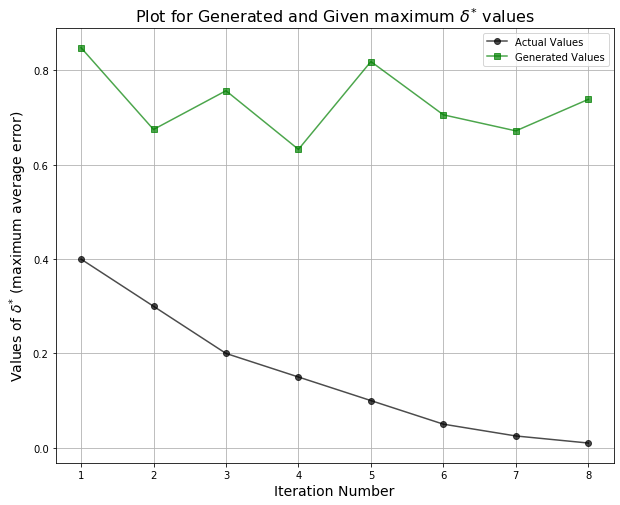

In [43]:
iters = [i for i in range(1,9)]
plt.figure(figsize=(10,8))
plt.title("Plot for Generated and Given maximum $ \delta^{*}$ values",fontsize=16)
plt.xlabel("Iteration Number", fontsize = 14)
plt.ylabel("Values of $ \delta^{*}$ (maximum average error)",fontsize = 14)
plt.grid()
plt.plot(iters, deltas, label = 'Actual Values', color = 'black', alpha = 0.7, marker = 'o')
plt.plot(iters, generated_deltas, label = 'Generated Values', color = 'green', alpha = 0.7, marker = 's')
plt.legend()
plt.savefig("Plot for verifying Cost Lower Bound.JPG",dpi = 200)

## Plot 2
- Plotting the error in the Generated and the Given delta values

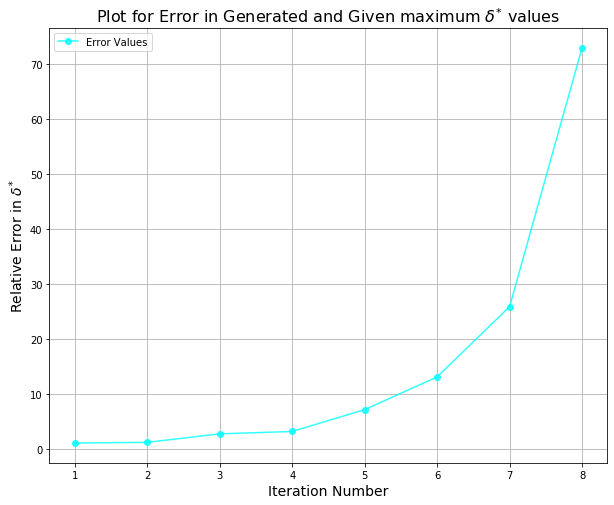

In [44]:
plt.figure(figsize=(10,8))
plt.title("Plot for Error in Generated and Given maximum $ \delta^{*}$ values",fontsize=16)
plt.xlabel("Iteration Number", fontsize = 14)
plt.ylabel("Relative Error in $ \delta^{*}$",fontsize = 14)
plt.grid()
plt.plot(iters, errors, label = 'Error Values', color = 'cyan', alpha = 0.8, marker = 'o')
plt.legend()
plt.savefig("Plot for Error in Cost Lower Bound.JPG",dpi = 200)